In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import pickle
import xgboost as xgb
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df = pd.read_csv('/content/Dataset.csv')
df

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,insurance_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,insurance_id,isOpen
0,U001,200315290,KWI in,07-03-2019 00:00,2019,1928826755,20-02-2019,20190220,20190220,20190307,USD,RV,1,21227.05,20190220,NAA8,1.928827e+09,0
1,U001,200769623,WAL-MAR foundation,16-01-2020 00:00,2020,1930350280,04-01-2020,20200103,20200104,20200119,USD,RV,1,5669.72,20200104,NAH4,1.930350e+09,0
2,U001,200820380,SMITH'S associates,08-07-2019 00:00,2019,1929517125,21-06-2019,20190619,20190621,20190706,USD,RV,1,67968.48,20190621,NAA8,1.929517e+09,0
3,U001,200769623,WAL-MAR corp,22-03-2019 00:00,2019,1928942930,12-03-2019,20190311,20190312,20190327,USD,RV,1,61395.73,20190312,NAH4,1.928943e+09,0
4,U001,200230690,DECA in,03-06-2019 00:00,2019,1929350366,21-05-2019,20190521,20190521,20190608,USD,RV,1,1067.72,20190516,NAM4,1.929350e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200726979,BJ'S us,NaN,2020,1930708917,27-03-2020,20200326,20200327,20200411,USD,RV,1,261.84,20200327,NAA8,1.930709e+09,1
49996,U001,CCCA02,KRAFT in,NaN,2020,1930693747,25-03-2020,20200324,20200325,20200429,USD,RV,1,14151.51,20200325,NAG2,1.930694e+09,1
49997,U001,200762301,C&S WH corporation,NaN,2020,1930605840,06-03-2020,20200305,20200306,20200321,USD,RV,1,14898.82,20200306,NAC6,1.930606e+09,1
49998,U001,100001196,DOLLAR,NaN,2020,1930761282,09-04-2020,20200408,20200409,20200424,USD,RV,1,5127.95,20200409,NAA8,1.930761e+09,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   insurance_code          50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              45181 non-null  object 
 4   insurance_year          50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  insurance_currency      50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  total_open_amount       50000 non-null  float64
 14  baseline_create_date    50000 non-null

In [4]:
df.isnull().sum()

insurance_code               0
cust_number                  0
name_customer                0
clear_date                4819
insurance_year               0
doc_id                       0
posting_date                 0
document_create_date         0
document_create_date.1       0
due_in_date                  0
insurance_currency           0
document type                0
posting_id                   0
total_open_amount            0
baseline_create_date         0
cust_payment_terms           0
insurance_id                 3
isOpen                       0
dtype: int64

In [5]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['document_create_date.1'].head()

0   2019-02-20
1   2020-01-04
2   2019-06-21
3   2019-03-12
4   2019-05-21
Name: document_create_date.1, dtype: datetime64[ns]

In [6]:
#df['clear_date']=pd.to_datetime(df['clear_date'],format='%d-%m-%Y %H:%m:%S')
df['clear_date'] = pd.to_datetime(df['clear_date'], format='%d-%m-%Y %H:%S')
df['clear_date'].head()

0   2019-03-07
1   2020-01-16
2   2019-07-08
3   2019-03-22
4   2019-06-03
Name: clear_date, dtype: datetime64[ns]

In [8]:
df['posting_date']=pd.to_datetime(df['posting_date'],format='%d-%m-%Y')
df['posting_date'].head()

0   2019-02-20
1   2020-01-04
2   2019-06-21
3   2019-03-12
4   2019-05-21
Name: posting_date, dtype: datetime64[ns]

In [9]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['due_in_date'].head()

0   2019-03-07
1   2020-01-19
2   2019-07-06
3   2019-03-27
4   2019-06-08
Name: due_in_date, dtype: datetime64[ns]

In [10]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['baseline_create_date'].head()

0   2019-02-20
1   2020-01-04
2   2019-06-21
3   2019-03-12
4   2019-05-16
Name: baseline_create_date, dtype: datetime64[ns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   insurance_code          50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              45181 non-null  datetime64[ns]
 4   insurance_year          50000 non-null  int64         
 5   doc_id                  50000 non-null  int64         
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  int64         
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  insurance_currency      50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  int64 

In [12]:
df["document type"].value_counts()

RV    49997
X2        3
Name: document type, dtype: int64

In [13]:
df.dropna(axis=0,subset=['insurance_id'],inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape
df

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,insurance_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,insurance_id,isOpen
0,U001,200315290,KWI in,2019-03-07,2019,1928826755,2019-02-20,20190220,2019-02-20,2019-03-07,USD,RV,1,21227.05,2019-02-20,NAA8,1.928827e+09,0
1,U001,200769623,WAL-MAR foundation,2020-01-16,2020,1930350280,2020-01-04,20200103,2020-01-04,2020-01-19,USD,RV,1,5669.72,2020-01-04,NAH4,1.930350e+09,0
2,U001,200820380,SMITH'S associates,2019-07-08,2019,1929517125,2019-06-21,20190619,2019-06-21,2019-07-06,USD,RV,1,67968.48,2019-06-21,NAA8,1.929517e+09,0
3,U001,200769623,WAL-MAR corp,2019-03-22,2019,1928942930,2019-03-12,20190311,2019-03-12,2019-03-27,USD,RV,1,61395.73,2019-03-12,NAH4,1.928943e+09,0
4,U001,200230690,DECA in,2019-06-03,2019,1929350366,2019-05-21,20190521,2019-05-21,2019-06-08,USD,RV,1,1067.72,2019-05-16,NAM4,1.929350e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,U001,200726979,BJ'S us,NaT,2020,1930708917,2020-03-27,20200326,2020-03-27,2020-04-11,USD,RV,1,261.84,2020-03-27,NAA8,1.930709e+09,1
49993,U001,CCCA02,KRAFT in,NaT,2020,1930693747,2020-03-25,20200324,2020-03-25,2020-04-29,USD,RV,1,14151.51,2020-03-25,NAG2,1.930694e+09,1
49994,U001,200762301,C&S WH corporation,NaT,2020,1930605840,2020-03-06,20200305,2020-03-06,2020-03-21,USD,RV,1,14898.82,2020-03-06,NAC6,1.930606e+09,1
49995,U001,100001196,DOLLAR,NaT,2020,1930761282,2020-04-09,20200408,2020-04-09,2020-04-24,USD,RV,1,5127.95,2020-04-09,NAA8,1.930761e+09,1


In [14]:
for cols in df.columns:
   print(f"{cols} - {df[f'{cols}'].nunique()}")

insurance_code - 6
cust_number - 1120
name_customer - 4291
clear_date - 401
insurance_year - 2
doc_id - 49997
posting_date - 502
document_create_date - 504
document_create_date.1 - 502
due_in_date - 543
insurance_currency - 2
document type - 1
posting_id - 1
total_open_amount - 45333
baseline_create_date - 504
cust_payment_terms - 75
insurance_id - 49997
isOpen - 2


In [15]:
unique_cols =  [x for x in df.columns if df[x].nunique()==1]
print(unique_cols)
df.drop(unique_cols,axis=1,inplace=True)
df.columns

['document type', 'posting_id']


Index(['insurance_code', 'cust_number', 'name_customer', 'clear_date',
       'insurance_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'insurance_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'insurance_id', 'isOpen'],
      dtype='object')

In [16]:
df.isnull().any()

insurance_code            False
cust_number               False
name_customer             False
clear_date                 True
insurance_year            False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
insurance_currency        False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
insurance_id              False
isOpen                    False
dtype: bool

In [17]:
def findDuplicateColumns(df):
    duplicatecolumns=set()
    for x in range(df.shape[1]):
        col1=df.iloc[:,x]
        for y in range(x+1,df.shape[1]):
            col2=df.iloc[:,y]
            if col1.equals(col2):
                duplicatecolumns.add(df.columns.values[x])
    return list(duplicatecolumns)

In [18]:
dr=findDuplicateColumns(df)
dr

['posting_date']

In [19]:
df.drop(columns=dr,inplace=True)

In [20]:
df.drop(columns=['document_create_date'],inplace=True)

In [21]:
df.drop(columns=['insurance_id'],inplace=True)
df

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200315290,KWI in,2019-03-07,2019,1928826755,2019-02-20,2019-03-07,USD,21227.05,2019-02-20,NAA8,0
1,U001,200769623,WAL-MAR foundation,2020-01-16,2020,1930350280,2020-01-04,2020-01-19,USD,5669.72,2020-01-04,NAH4,0
2,U001,200820380,SMITH'S associates,2019-07-08,2019,1929517125,2019-06-21,2019-07-06,USD,67968.48,2019-06-21,NAA8,0
3,U001,200769623,WAL-MAR corp,2019-03-22,2019,1928942930,2019-03-12,2019-03-27,USD,61395.73,2019-03-12,NAH4,0
4,U001,200230690,DECA in,2019-06-03,2019,1929350366,2019-05-21,2019-06-08,USD,1067.72,2019-05-16,NAM4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,U001,200726979,BJ'S us,NaT,2020,1930708917,2020-03-27,2020-04-11,USD,261.84,2020-03-27,NAA8,1
49993,U001,CCCA02,KRAFT in,NaT,2020,1930693747,2020-03-25,2020-04-29,USD,14151.51,2020-03-25,NAG2,1
49994,U001,200762301,C&S WH corporation,NaT,2020,1930605840,2020-03-06,2020-03-21,USD,14898.82,2020-03-06,NAC6,1
49995,U001,100001196,DOLLAR,NaT,2020,1930761282,2020-04-09,2020-04-24,USD,5127.95,2020-04-09,NAA8,1


In [22]:
#df['delay']=(df['clear_date']-df['due_in_date']).dt.days
df['delay'] = (pd.to_datetime(df['clear_date']) - pd.to_datetime(df['due_in_date'])).dt.days


In [23]:
df.sort_values(by='document_create_date.1',inplace=True) # sorting in ascending order by document_create_date.1
df

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
26302,U001,200769623,WAL-MAR foundation,2019-01-09,2019,1928536197,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
36165,U001,200762301,C&S WH co,2019-01-15,2019,1928539714,2018-12-30,2019-01-14,USD,18116.87,2018-12-30,NAC6,0,1.0
38783,U001,200955827,KE,2019-01-16,2019,1928535996,2018-12-30,2019-01-14,USD,32856.32,2018-12-30,NAA8,0,2.0
4134,U001,200744019,TARG trust,2019-01-18,2019,1928541864,2018-12-30,2019-01-14,USD,11982.59,2018-12-30,NAA8,0,4.0
8597,U001,200794332,COST corp,2019-01-14,2019,1928541536,2018-12-30,2019-01-14,USD,32715.47,2018-12-30,NAAX,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46773,U001,200592182,DECA us,NaT,2020,1930886665,2020-05-12,2020-05-24,USD,1226.00,2020-05-01,NAM4,1,NaN
45434,U001,200769623,WAL-MAR co,NaT,2020,1930891047,2020-05-12,2020-05-27,USD,36513.74,2020-05-12,NAH4,1,NaN
45919,U001,200915438,GROC trust,NaT,2020,1930875867,2020-05-13,2020-05-28,USD,15220.00,2020-05-13,NAA8,1,NaN
48707,U001,100030964,NATURA corporation,NaT,2020,1930897732,2020-05-16,2020-05-31,USD,17893.25,2020-05-16,NAA8,1,NaN


In [24]:
test_data = df[df.clear_date.isnull()].reset_index()
test_data.drop(columns=['index'],inplace=True)
test_data

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200772595,SAFEW associates,NaT,2020,1930566304,2020-02-27,2020-03-13,USD,16157.16,2020-02-27,NAA8,1,NaN
1,CA02,140105847,GORDON F co,NaT,2020,2960614257,2020-02-27,2020-03-10,CAD,722.50,2020-02-29,CA10,1,NaN
2,U001,200744019,TARG co,NaT,2020,1930576164,2020-02-27,2020-03-13,USD,4206.28,2020-02-27,NAA8,1,NaN
3,U001,200943275,US in,NaT,2020,1930567215,2020-02-27,2020-03-13,USD,51877.23,2020-02-27,NAA8,1,NaN
4,U001,200726979,BJ'S llc,NaT,2020,1930573874,2020-02-27,2020-03-13,USD,365.88,2020-02-27,NAA8,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,U001,200592182,DECA us,NaT,2020,1930886665,2020-05-12,2020-05-24,USD,1226.00,2020-05-01,NAM4,1,NaN
4815,U001,200769623,WAL-MAR co,NaT,2020,1930891047,2020-05-12,2020-05-27,USD,36513.74,2020-05-12,NAH4,1,NaN
4816,U001,200915438,GROC trust,NaT,2020,1930875867,2020-05-13,2020-05-28,USD,15220.00,2020-05-13,NAA8,1,NaN
4817,U001,100030964,NATURA corporation,NaT,2020,1930897732,2020-05-16,2020-05-31,USD,17893.25,2020-05-16,NAA8,1,NaN


In [25]:
ts = test_data.copy()


In [26]:
y_test = test_data["delay"]
y_test

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4814   NaN
4815   NaN
4816   NaN
4817   NaN
4818   NaN
Name: delay, Length: 4819, dtype: float64

In [27]:
x_test = test_data.iloc[:,:-1].copy()
x_test

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200772595,SAFEW associates,NaT,2020,1930566304,2020-02-27,2020-03-13,USD,16157.16,2020-02-27,NAA8,1
1,CA02,140105847,GORDON F co,NaT,2020,2960614257,2020-02-27,2020-03-10,CAD,722.50,2020-02-29,CA10,1
2,U001,200744019,TARG co,NaT,2020,1930576164,2020-02-27,2020-03-13,USD,4206.28,2020-02-27,NAA8,1
3,U001,200943275,US in,NaT,2020,1930567215,2020-02-27,2020-03-13,USD,51877.23,2020-02-27,NAA8,1
4,U001,200726979,BJ'S llc,NaT,2020,1930573874,2020-02-27,2020-03-13,USD,365.88,2020-02-27,NAA8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,U001,200592182,DECA us,NaT,2020,1930886665,2020-05-12,2020-05-24,USD,1226.00,2020-05-01,NAM4,1
4815,U001,200769623,WAL-MAR co,NaT,2020,1930891047,2020-05-12,2020-05-27,USD,36513.74,2020-05-12,NAH4,1
4816,U001,200915438,GROC trust,NaT,2020,1930875867,2020-05-13,2020-05-28,USD,15220.00,2020-05-13,NAA8,1
4817,U001,100030964,NATURA corporation,NaT,2020,1930897732,2020-05-16,2020-05-31,USD,17893.25,2020-05-16,NAA8,1


In [28]:
train_data2 = df[df.clear_date.notnull()].reset_index() #train set on non-null clear date
train_data2.drop(columns=['index'],inplace=True)
train_data2

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200769623,WAL-MAR foundation,2019-01-09,2019,1928536197,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
1,U001,200762301,C&S WH co,2019-01-15,2019,1928539714,2018-12-30,2019-01-14,USD,18116.87,2018-12-30,NAC6,0,1.0
2,U001,200955827,KE,2019-01-16,2019,1928535996,2018-12-30,2019-01-14,USD,32856.32,2018-12-30,NAA8,0,2.0
3,U001,200744019,TARG trust,2019-01-18,2019,1928541864,2018-12-30,2019-01-14,USD,11982.59,2018-12-30,NAA8,0,4.0
4,U001,200794332,COST corp,2019-01-14,2019,1928541536,2018-12-30,2019-01-14,USD,32715.47,2018-12-30,NAAX,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45173,CA02,140106408,WAL-M us,2020-03-20,2020,2960616884,2020-02-27,2020-03-09,CAD,2878.29,2020-02-28,CA10,0,11.0
45174,U001,200721222,GO associates,2020-03-13,2020,1930576154,2020-02-27,2020-05-02,USD,10770.76,2020-02-27,NAGD,0,-50.0
45175,U001,200744707,PERFOR,2020-03-16,2020,1930573721,2020-02-27,2020-03-13,USD,39408.22,2020-02-27,NAA8,0,3.0
45176,U001,200759878,SA in,2020-03-13,2020,1930571720,2020-02-27,2020-03-13,USD,70504.55,2020-02-27,NAH4,0,0.0


In [29]:
x = train_data2['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y = train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] <= x].iloc[-1]
print(y)
train_data2['document_create_date.1'].loc[train_data2['document_create_date.1'] == y].last_valid_index()

2020-01-12 00:00:00


40518

In [30]:
val2 = train_data2.iloc[40519: , :].copy()
val2.reset_index(drop=True,inplace=True)
val2

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200789077,US corp,2020-01-24,2020,1930392371,2020-01-13,2020-01-28,USD,32547.72,2020-01-13,NAA8,0,-4.0
1,U001,200769623,WAL-MAR in,2020-01-23,2020,1930388588,2020-01-13,2020-01-28,USD,4388.75,2020-01-13,NAH4,0,-5.0
2,U001,200769623,WAL-MAR co,2020-01-23,2020,1930387692,2020-01-13,2020-01-28,USD,6040.68,2020-01-13,NAH4,0,-5.0
3,U001,200769623,WAL-MAR in,2020-01-23,2020,1930381855,2020-01-13,2020-01-28,USD,71525.23,2020-01-13,NAH4,0,-5.0
4,U001,200117492,PE in,2020-01-13,2020,1930392617,2020-01-13,2020-01-28,USD,231.24,2020-01-13,NAA8,0,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4654,CA02,140106408,WAL-M us,2020-03-20,2020,2960616884,2020-02-27,2020-03-09,CAD,2878.29,2020-02-28,CA10,0,11.0
4655,U001,200721222,GO associates,2020-03-13,2020,1930576154,2020-02-27,2020-05-02,USD,10770.76,2020-02-27,NAGD,0,-50.0
4656,U001,200744707,PERFOR,2020-03-16,2020,1930573721,2020-02-27,2020-03-13,USD,39408.22,2020-02-27,NAA8,0,3.0
4657,U001,200759878,SA in,2020-03-13,2020,1930571720,2020-02-27,2020-03-13,USD,70504.55,2020-02-27,NAH4,0,0.0


In [31]:
train_data1 = pd.concat([train_data2, val2]).drop_duplicates(keep=False)
train_data1

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200769623,WAL-MAR foundation,2019-01-09,2019,1928536197,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
1,U001,200762301,C&S WH co,2019-01-15,2019,1928539714,2018-12-30,2019-01-14,USD,18116.87,2018-12-30,NAC6,0,1.0
2,U001,200955827,KE,2019-01-16,2019,1928535996,2018-12-30,2019-01-14,USD,32856.32,2018-12-30,NAA8,0,2.0
3,U001,200744019,TARG trust,2019-01-18,2019,1928541864,2018-12-30,2019-01-14,USD,11982.59,2018-12-30,NAA8,0,4.0
4,U001,200794332,COST corp,2019-01-14,2019,1928541536,2018-12-30,2019-01-14,USD,32715.47,2018-12-30,NAAX,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40514,U001,200726979,BJ'S corporation,2020-01-27,2020,1930395348,2020-01-12,2020-01-27,USD,2020.42,2020-01-12,NAA8,0,0.0
40515,U001,200769623,WAL-MAR foundation,2020-01-24,2020,1930389662,2020-01-12,2020-01-27,USD,256.91,2020-01-12,NAH4,0,-3.0
40516,U001,200769623,WAL-MAR systems,2020-01-24,2020,1930389680,2020-01-12,2020-01-27,USD,256.91,2020-01-12,NAH4,0,-3.0
40517,U001,200769623,WAL-MAR corp,2020-01-22,2020,1930383655,2020-01-12,2020-01-27,USD,1118.71,2020-01-12,NAH4,0,-5.0


In [32]:
x2 = train_data1['document_create_date.1'].iloc[-1] - pd.DateOffset(months=1, days=15)
y2 = train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] <= x2].iloc[-1]
print(y2)
train_data1['document_create_date.1'].loc[train_data1['document_create_date.1'] == y2].last_valid_index()

2019-11-27 00:00:00


37251

In [33]:
val1 = train_data1.iloc[37251: , :].copy()
val1.reset_index(drop=True,inplace=True)
val1

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,CCU013,KRAFT F corporation,2019-12-20,2019,1930201368,2019-11-27,2019-11-27,USD,11657.40,2019-11-27,NAX2,0,23.0
1,U001,200705089,JETR systems,2019-12-13,2019,1930195598,2019-11-28,2019-12-13,USD,2851.81,2019-11-28,NAA8,0,0.0
2,U001,200936373,SUPE associates,2019-12-13,2019,1930192073,2019-11-28,2019-12-13,USD,170537.26,2019-11-28,NAA8,0,0.0
3,CA02,140104440,SO corp,2019-12-19,2019,2960591997,2019-11-28,2019-12-16,CAD,272728.34,2019-12-06,CA10,0,3.0
4,U001,200769369,DI,2019-12-13,2019,1930198478,2019-11-28,2019-12-13,USD,83131.55,2019-11-28,NAA8,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,U001,200726979,BJ'S corporation,2020-01-27,2020,1930395348,2020-01-12,2020-01-27,USD,2020.42,2020-01-12,NAA8,0,0.0
3264,U001,200769623,WAL-MAR foundation,2020-01-24,2020,1930389662,2020-01-12,2020-01-27,USD,256.91,2020-01-12,NAH4,0,-3.0
3265,U001,200769623,WAL-MAR systems,2020-01-24,2020,1930389680,2020-01-12,2020-01-27,USD,256.91,2020-01-12,NAH4,0,-3.0
3266,U001,200769623,WAL-MAR corp,2020-01-22,2020,1930383655,2020-01-12,2020-01-27,USD,1118.71,2020-01-12,NAH4,0,-5.0


In [34]:
train_data = pd.concat([train_data1, val1]).drop_duplicates(keep=False)
train_data

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200769623,WAL-MAR foundation,2019-01-09,2019,1928536197,2018-12-30,2019-01-14,USD,25749.68,2018-12-30,NAH4,0,-5.0
1,U001,200762301,C&S WH co,2019-01-15,2019,1928539714,2018-12-30,2019-01-14,USD,18116.87,2018-12-30,NAC6,0,1.0
2,U001,200955827,KE,2019-01-16,2019,1928535996,2018-12-30,2019-01-14,USD,32856.32,2018-12-30,NAA8,0,2.0
3,U001,200744019,TARG trust,2019-01-18,2019,1928541864,2018-12-30,2019-01-14,USD,11982.59,2018-12-30,NAA8,0,4.0
4,U001,200794332,COST corp,2019-01-14,2019,1928541536,2018-12-30,2019-01-14,USD,32715.47,2018-12-30,NAAX,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37246,U001,200744019,TARG us,2019-12-10,2019,1930193108,2019-11-27,2019-12-12,USD,19065.71,2019-11-27,NAA8,0,-2.0
37247,U001,200762301,C&S WH in,2019-12-12,2019,1930203701,2019-11-27,2019-12-12,USD,65889.87,2019-11-27,NAC6,0,0.0
37248,U001,200769623,WAL-MAR systems,2019-12-09,2019,1930195803,2019-11-27,2019-12-12,USD,97932.14,2019-11-27,NAH4,0,-3.0
37249,U001,200152991,JET co,2019-12-17,2019,1930201787,2019-11-27,2019-12-12,USD,806.00,2019-11-27,NAA8,0,5.0


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37251 entries, 0 to 37250
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   insurance_code          37251 non-null  object        
 1   cust_number             37251 non-null  object        
 2   name_customer           37251 non-null  object        
 3   clear_date              37251 non-null  datetime64[ns]
 4   insurance_year          37251 non-null  int64         
 5   doc_id                  37251 non-null  int64         
 6   document_create_date.1  37251 non-null  datetime64[ns]
 7   due_in_date             37251 non-null  datetime64[ns]
 8   insurance_currency      37251 non-null  object        
 9   total_open_amount       37251 non-null  float64       
 10  baseline_create_date    37251 non-null  datetime64[ns]
 11  cust_payment_terms      37251 non-null  object        
 12  isOpen                  37251 non-null  int64 

In [36]:
train_data.insurance_code.value_counts()

U001    33712
CA02     2883
U013      522
U002      124
U005        8
U007        2
Name: insurance_code, dtype: int64

<Axes: xlabel='insurance_code', ylabel='count'>

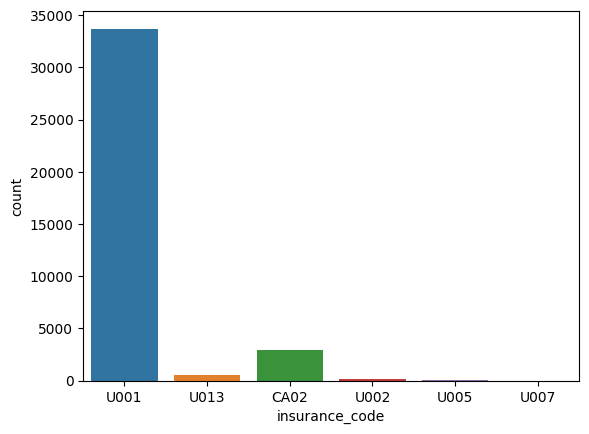

In [37]:
sns.countplot(x = train_data['insurance_code'])



In [38]:
train_data.cust_number.value_counts()

200769623    8849
200726979    1514
200762301    1074
200759878    1013
200794332     897
             ... 
200987178       1
200439044       1
100054234       1
100017728       1
100004317       1
Name: cust_number, Length: 1050, dtype: int64

In [39]:
len(dict(train_data.cust_number.value_counts()))

1050

In [40]:
train_data.name_customer.value_counts()

WAL-MAR corporation    844
WAL-MAR systems        831
WAL-MAR foundation     828
WAL-MAR llc            819
WAL-MAR co             809
                      ... 
NORTHW in                1
DAIRY llc                1
KRAS llc                 1
LFC/ZM llc               1
NATC                     1
Name: name_customer, Length: 3866, dtype: int64

In [41]:
train_data.clear_date.min()

Timestamp('2019-01-04 00:00:00')

In [42]:
train_data.clear_date.max()

Timestamp('2019-12-31 00:00:00')

In [43]:
df['clear_date'] = pd.to_datetime(df['clear_date'], errors='coerce')
clear_month = train_data['clear_date'].dt.month
clear_month.value_counts()

5     3788
4     3585
11    3524
8     3505
10    3456
7     3406
9     3405
3     3311
6     3294
2     2772
12    1673
1     1532
Name: clear_date, dtype: int64

<Axes: xlabel='clear_date', ylabel='count'>

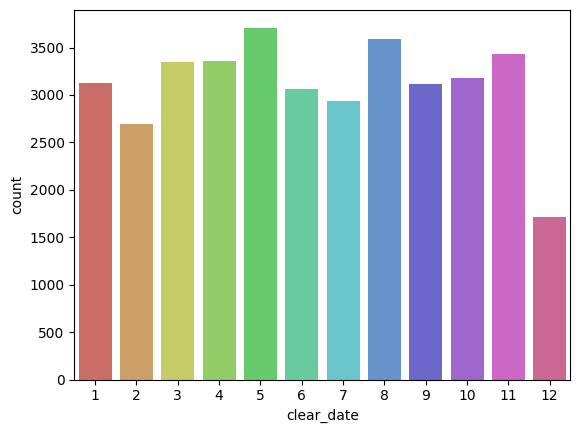

In [ ]:
sns.countplot(x=clear_month, palette="hls")

In [44]:
train_data.insurance_year.value_counts()

2019    37251
Name: insurance_year, dtype: int64

In [45]:
train_data["document_create_date.1"].min()

Timestamp('2018-12-30 00:00:00')

In [46]:
train_data["document_create_date.1"].max()

Timestamp('2019-11-27 00:00:00')

In [47]:
train_data["insurance_currency"].value_counts()


USD    34366
CAD     2885
Name: insurance_currency, dtype: int64

In [48]:
train_data['total_open_amount'].describe().apply(lambda x: format(x,'f'))


count      37251.000000
mean       32218.621774
std        40169.209569
min            2.400000
25%         4596.290000
50%        17249.360000
75%        46904.465000
max      1011888.450000
Name: total_open_amount, dtype: object

In [49]:
open_amount_bins = pd.qcut(train_data['total_open_amount'],q=10)
open_amount_bins.value_counts()

(2.399, 796.7]           3726
(796.7, 2877.9]          3725
(2877.9, 6907.22]        3725
(6907.22, 12700.28]      3725
(12700.28, 17249.36]     3725
(17249.36, 25234.04]     3725
(25234.04, 39254.75]     3725
(39254.75, 55292.53]     3725
(55292.53, 81919.4]      3725
(81919.4, 1011888.45]    3725
Name: total_open_amount, dtype: int64

In [50]:
amount_bins = [0,5000,10000,50000,100000,1100000]
new_open_amount_bin = pd.cut(train_data['total_open_amount'], bins = amount_bins)

<Axes: xlabel='total_open_amount', ylabel='count'>

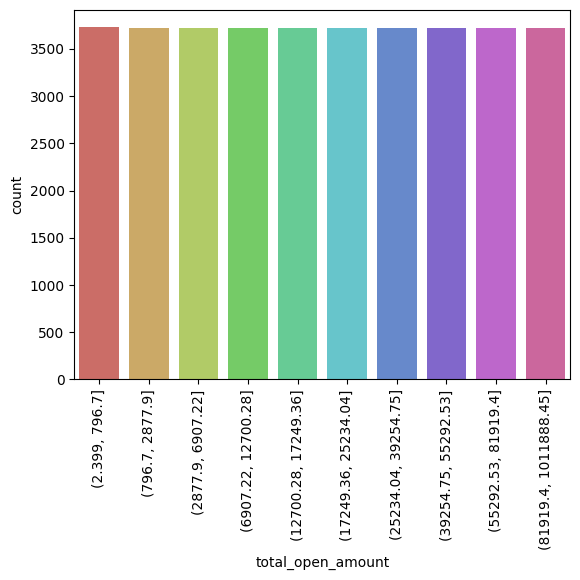

In [51]:
plt.xticks(fontsize=10, rotation=90)
sns.countplot(x=open_amount_bins, palette="hls")

In [52]:
train_data.loc[train_data["document_create_date.1"]!=train_data["baseline_create_date"]]

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
23,CA02,140105847,GORDON F in,2019-01-14,2019,2960520535,2018-12-30,2019-01-12,CAD,18061.92,2019-01-02,CA10,0,2.0
94,CA02,140105686,SYSC co,2019-01-17,2019,2960519675,2018-12-31,2019-01-13,CAD,24557.30,2019-01-03,CA10,0,4.0
133,CA02,140104429,COSTCO llc,2019-01-14,2019,2960520802,2018-12-31,2019-01-13,CAD,4375.60,2019-01-03,CA10,0,1.0
183,CA02,140104429,COSTCO corporation,2019-01-18,2019,2960520558,2019-01-02,2019-01-19,CAD,19318.06,2019-01-09,CA10,0,-1.0
185,CA02,140104340,COLABOR corporation,2019-01-17,2019,2960519377,2019-01-02,2019-01-14,CAD,18294.15,2019-01-04,CA10,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37153,CA02,140104429,COSTCO corporation,2019-12-13,2019,2960595530,2019-11-27,2019-12-09,CAD,2736.64,2019-11-29,CA10,0,4.0
37183,U001,200592182,DECA associates,2019-12-02,2019,1930199941,2019-11-27,2019-12-09,USD,1103.34,2019-11-16,NAM4,0,-7.0
37185,U001,200592182,DECA in,2019-12-02,2019,1930198843,2019-11-27,2019-12-09,USD,70.80,2019-11-16,NAM4,0,-7.0
37202,CA02,100034820,MTY TIKI llc,2019-12-06,2019,2960596042,2019-11-27,2019-12-09,CAD,13630.00,2019-11-29,CA10,0,-3.0


In [53]:
train_data.cust_payment_terms.value_counts()

NAA8    15119
NAH4     9758
CA10     2812
NAC6     1174
NAM4     1014
        ...  
NAD8        1
NAVC        1
NANC        1
NATX        1
NAUW        1
Name: cust_payment_terms, Length: 68, dtype: int64

In [54]:
len(dict(train_data1.cust_number.value_counts()))

1070

In [55]:
train_data.isOpen.value_counts()


0    37251
Name: isOpen, dtype: int64

In [56]:
train_data.delay[train_data.delay<0].count()

13438

In [57]:
train_data['delay']=train_data.delay.apply(lambda x: 0 if x<0 else x)
train_data.delay[train_data.delay<0].count()

0

In [58]:
train_data.delay.describe()

count    37251.000000
mean         2.821562
std          9.367708
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        277.000000
Name: delay, dtype: float64

In [59]:
train_data['insurance_currency'].value_counts()

USD    34366
CAD     2885
Name: insurance_currency, dtype: int64

In [60]:
train_data.groupby("insurance_code").insurance_currency.value_counts()

insurance_code  insurance_currency
CA02            CAD                    2883
U001            USD                   33712
U002            USD                     124
U005            USD                       8
U007            USD                       2
U013            USD                     520
                CAD                       2
Name: insurance_currency, dtype: int64

In [61]:
train_data.groupby("insurance_currency").insurance_code.value_counts()

insurance_currency  insurance_code
CAD                 CA02               2883
                    U013                  2
USD                 U001              33712
                    U013                520
                    U002                124
                    U005                  8
                    U007                  2
Name: insurance_code, dtype: int64

In [62]:
temp = train_data.loc[train_data['insurance_code'] == 'U013']
temp.loc[temp['insurance_currency']=='CAD']

,insurance_code,cust_number,name_customer,clear_date,insurance_year,doc_id,document_create_date.1,due_in_date,insurance_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
6441,U013,100052318,PRATT' trust,2019-03-26,2019,1991823133,2019-03-01,2019-03-31,CAD,1815.04,2019-03-01,NAVE,0,0.0
37009,U013,100052318,PRATT' co,2019-12-24,2019,1991834952,2019-11-26,2019-12-26,CAD,3373.05,2019-11-26,NAVE,0,0.0


In [63]:
delay_bins = [0,15,30,45,60,300]
delay_bucket = pd.cut(train_data['delay'], bins = delay_bins)
pd.crosstab(index = new_open_amount_bin, columns =delay_bucket)

delay,"(0, 15]","(15, 30]","(30, 45]","(45, 60]","(60, 300]"
total_open_amount,,,,,
"(0, 5000]",3227,130,109,102,98
"(5000, 10000]",1467,76,61,36,20
"(10000, 50000]",6223,292,183,113,66
"(50000, 100000]",2505,68,19,12,15
"(100000, 1100000]",1150,20,12,8,3


<Axes: xlabel='total_open_amount', ylabel='count'>

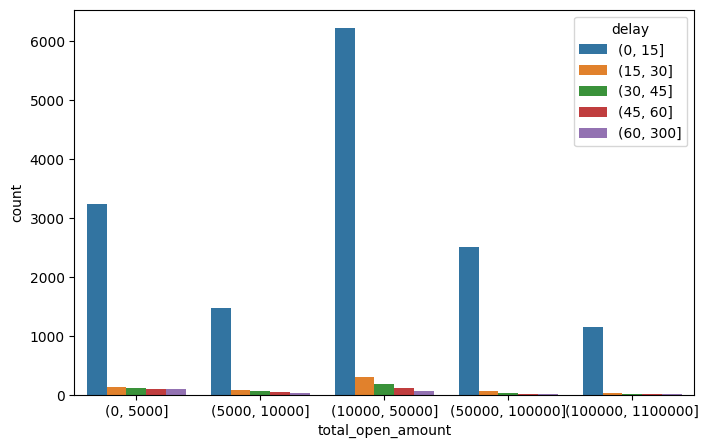

In [64]:
plt.figure(figsize=(8,5))
plt.xlabel("Amount bin")
sns.countplot(x = new_open_amount_bin, hue=delay_bucket)

In [65]:
train_data.corr()

<ipython-input-65-8d2cc80a8830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,insurance_year,doc_id,total_open_amount,isOpen,delay
insurance_year,NaN,NaN,NaN,NaN,NaN
doc_id,NaN,1.000000,0.177343,NaN,0.114095
total_open_amount,NaN,0.177343,1.000000,NaN,-0.047517
isOpen,NaN,NaN,NaN,NaN,NaN
delay,NaN,0.114095,-0.047517,NaN,1.000000


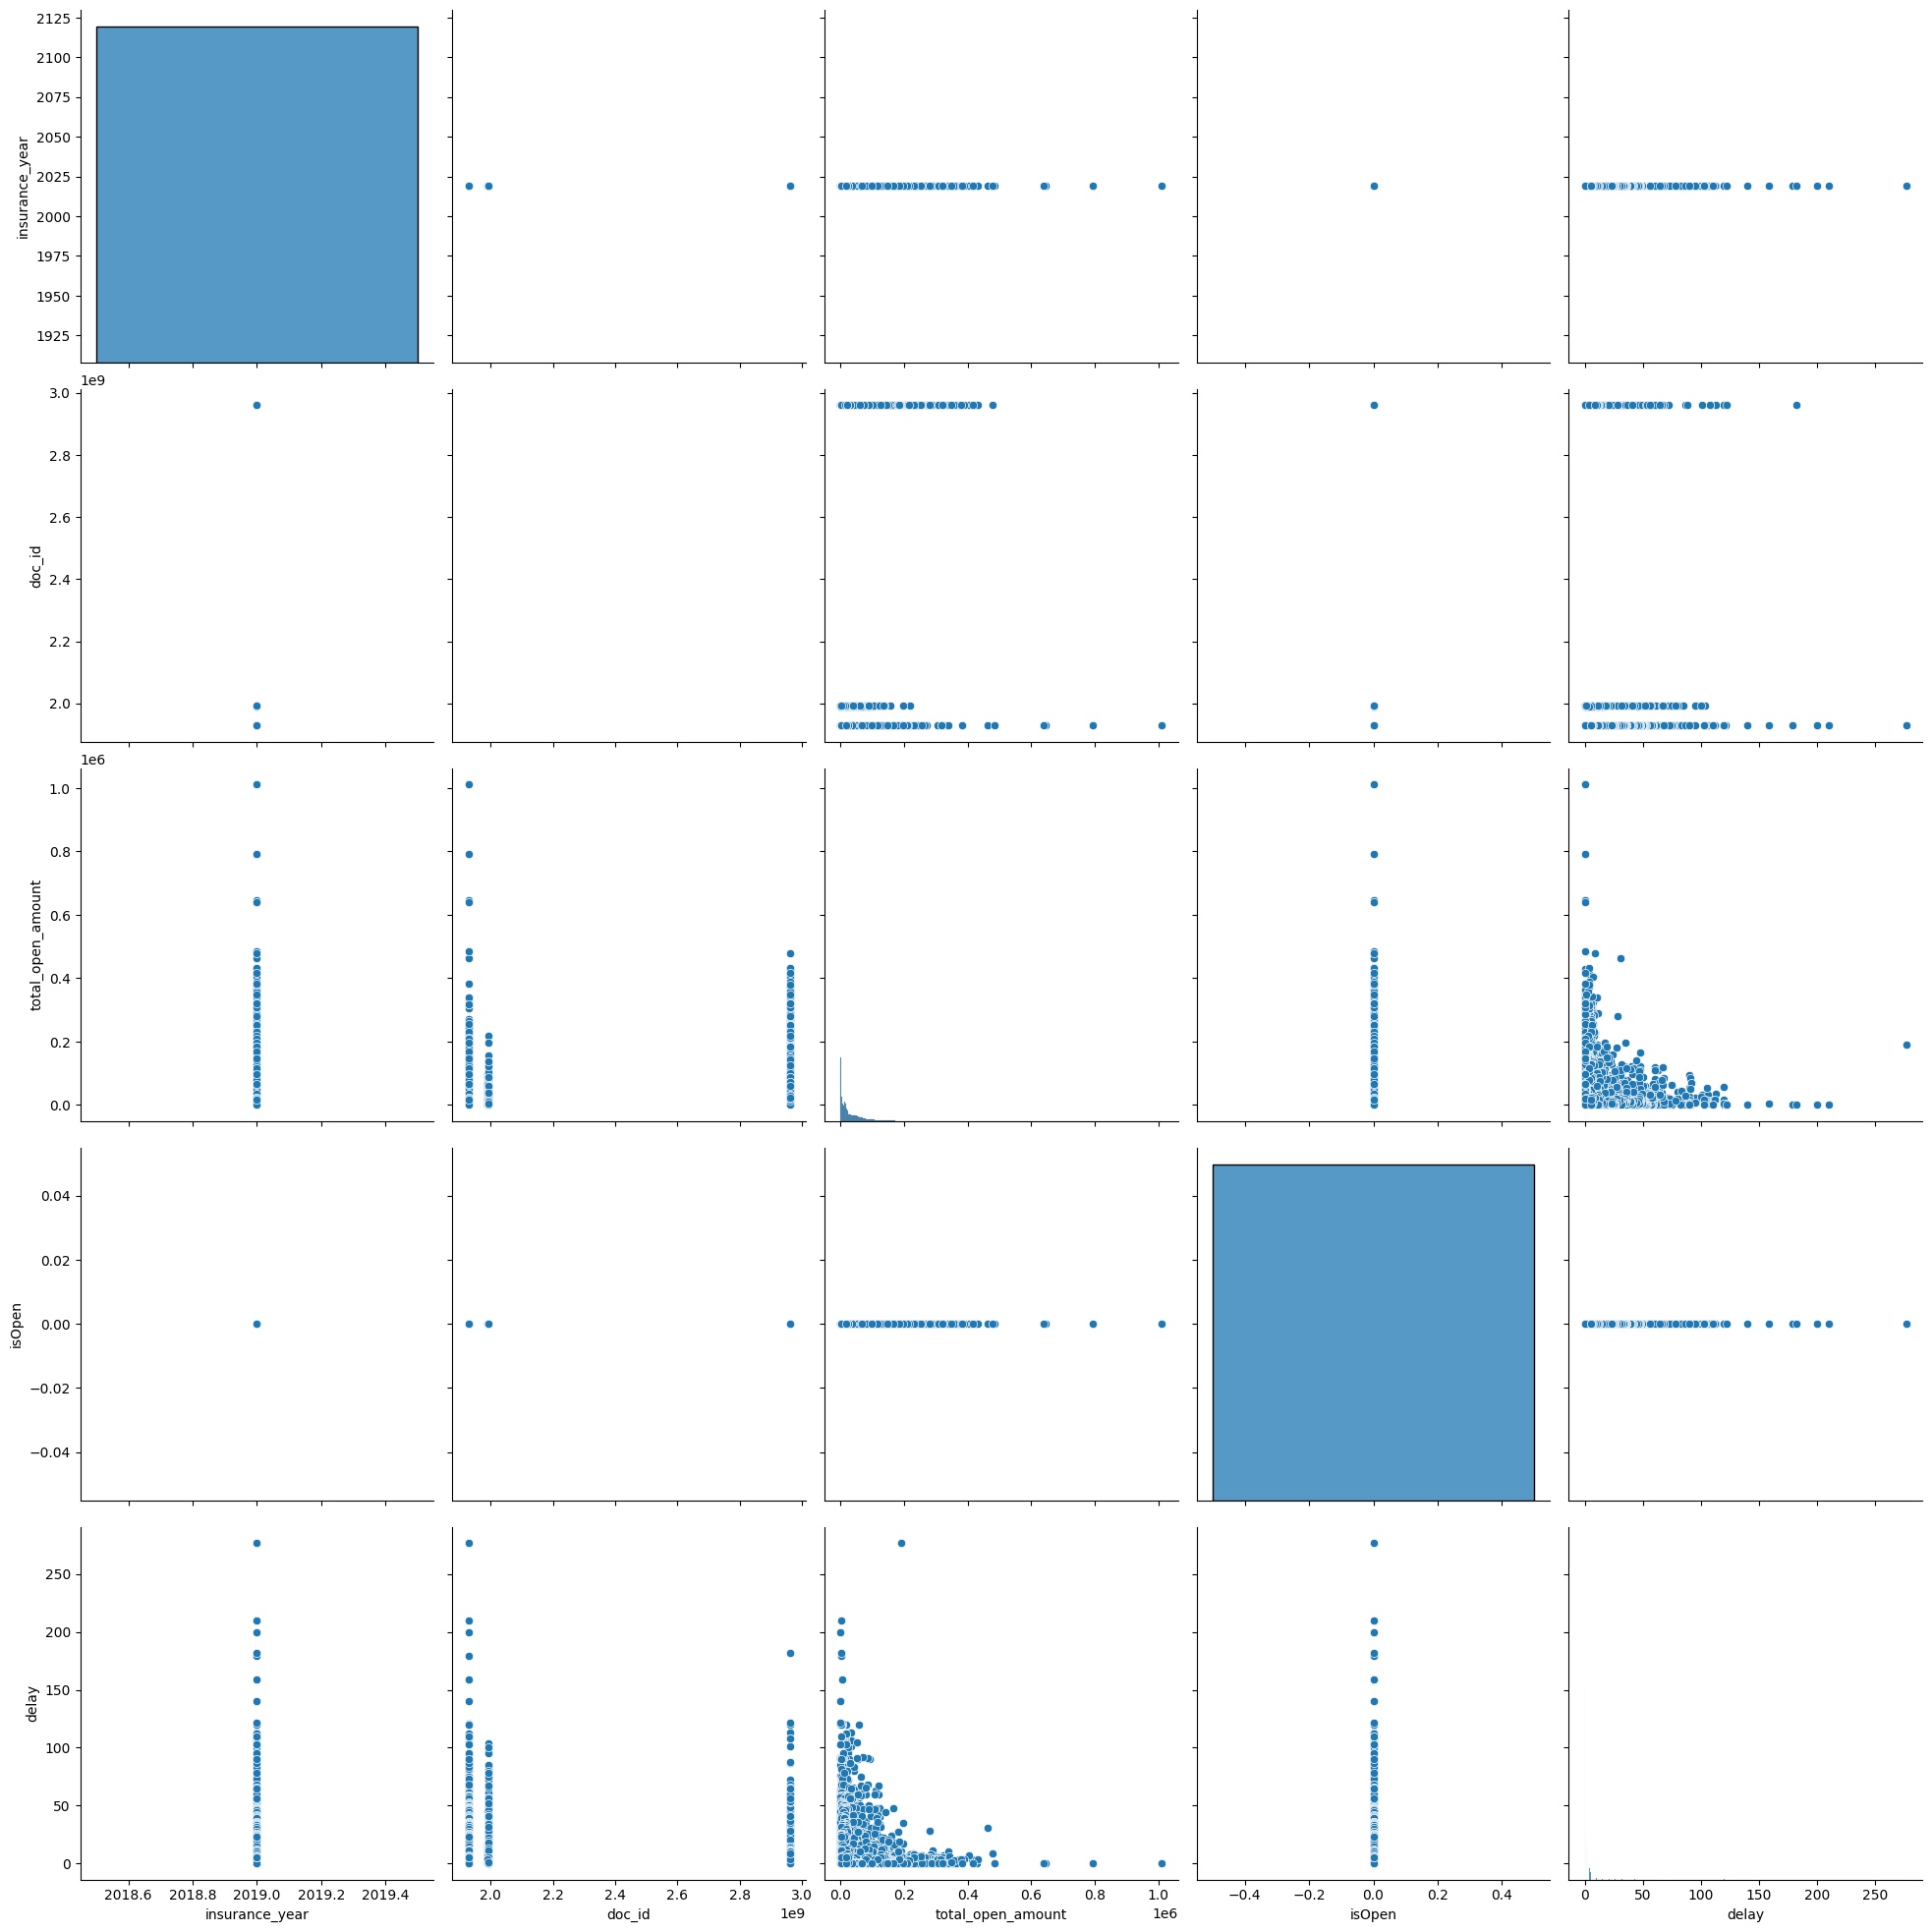

In [66]:
sns.pairplot(train_data, height=4)


In [67]:
train_data.drop(columns=['insurance_code', 'name_customer','insurance_year','insurance_currency','baseline_create_date', 'cust_payment_terms', 'isOpen'], inplace=True)
train_data

,cust_number,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,delay
0,200769623,2019-01-09,1928536197,2018-12-30,2019-01-14,25749.68,0.0
1,200762301,2019-01-15,1928539714,2018-12-30,2019-01-14,18116.87,1.0
2,200955827,2019-01-16,1928535996,2018-12-30,2019-01-14,32856.32,2.0
3,200744019,2019-01-18,1928541864,2018-12-30,2019-01-14,11982.59,4.0
4,200794332,2019-01-14,1928541536,2018-12-30,2019-01-14,32715.47,0.0
...,...,...,...,...,...,...,...
37246,200744019,2019-12-10,1930193108,2019-11-27,2019-12-12,19065.71,0.0
37247,200762301,2019-12-12,1930203701,2019-11-27,2019-12-12,65889.87,0.0
37248,200769623,2019-12-09,1930195803,2019-11-27,2019-12-12,97932.14,0.0
37249,200152991,2019-12-17,1930201787,2019-11-27,2019-12-12,806.00,5.0


In [68]:
train_data["doc_create_day"] = train_data["document_create_date.1"].dt.day
train_data["doc_create_month"] = train_data["document_create_date.1"].dt.month

train_data["due_day"] = train_data["due_in_date"].dt.day
train_data["due_month"] = train_data["due_in_date"].dt.month

In [69]:
train_data


,cust_number,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,200769623,2019-01-09,1928536197,2018-12-30,2019-01-14,25749.68,0.0,30,12,14,1
1,200762301,2019-01-15,1928539714,2018-12-30,2019-01-14,18116.87,1.0,30,12,14,1
2,200955827,2019-01-16,1928535996,2018-12-30,2019-01-14,32856.32,2.0,30,12,14,1
3,200744019,2019-01-18,1928541864,2018-12-30,2019-01-14,11982.59,4.0,30,12,14,1
4,200794332,2019-01-14,1928541536,2018-12-30,2019-01-14,32715.47,0.0,30,12,14,1
...,...,...,...,...,...,...,...,...,...,...,...
37246,200744019,2019-12-10,1930193108,2019-11-27,2019-12-12,19065.71,0.0,27,11,12,12
37247,200762301,2019-12-12,1930203701,2019-11-27,2019-12-12,65889.87,0.0,27,11,12,12
37248,200769623,2019-12-09,1930195803,2019-11-27,2019-12-12,97932.14,0.0,27,11,12,12
37249,200152991,2019-12-17,1930201787,2019-11-27,2019-12-12,806.00,5.0,27,11,12,12


In [70]:
train_data.drop(columns=['clear_date', 'document_create_date.1', 'due_in_date'], inplace=True)
train_data

,cust_number,doc_id,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month
0,200769623,1928536197,25749.68,0.0,30,12,14,1
1,200762301,1928539714,18116.87,1.0,30,12,14,1
2,200955827,1928535996,32856.32,2.0,30,12,14,1
3,200744019,1928541864,11982.59,4.0,30,12,14,1
4,200794332,1928541536,32715.47,0.0,30,12,14,1
...,...,...,...,...,...,...,...,...
37246,200744019,1930193108,19065.71,0.0,27,11,12,12
37247,200762301,1930203701,65889.87,0.0,27,11,12,12
37248,200769623,1930195803,97932.14,0.0,27,11,12,12
37249,200152991,1930201787,806.00,5.0,27,11,12,12


In [71]:
train_data['cn'] = train_data['cust_number'].str.extract('(\d+)')

# then will drop that column
train_data.drop('cust_number',axis=1,inplace=True)

#lets see the dataframe
train_data

,doc_id,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,1928536197,25749.68,0.0,30,12,14,1,200769623
1,1928539714,18116.87,1.0,30,12,14,1,200762301
2,1928535996,32856.32,2.0,30,12,14,1,200955827
3,1928541864,11982.59,4.0,30,12,14,1,200744019
4,1928541536,32715.47,0.0,30,12,14,1,200794332
...,...,...,...,...,...,...,...,...
37246,1930193108,19065.71,0.0,27,11,12,12,200744019
37247,1930203701,65889.87,0.0,27,11,12,12,200762301
37248,1930195803,97932.14,0.0,27,11,12,12,200769623
37249,1930201787,806.00,5.0,27,11,12,12,200152991


In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37251 entries, 0 to 37250
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   doc_id             37251 non-null  int64  
 1   total_open_amount  37251 non-null  float64
 2   delay              37251 non-null  float64
 3   doc_create_day     37251 non-null  int64  
 4   doc_create_month   37251 non-null  int64  
 5   due_day            37251 non-null  int64  
 6   due_month          37251 non-null  int64  
 7   cn                 37251 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 2.6+ MB


In [73]:
train_data['cn']=train_data['cn'].astype(str).astype(float)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37251 entries, 0 to 37250
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   doc_id             37251 non-null  int64  
 1   total_open_amount  37251 non-null  float64
 2   delay              37251 non-null  float64
 3   doc_create_day     37251 non-null  int64  
 4   doc_create_month   37251 non-null  int64  
 5   due_day            37251 non-null  int64  
 6   due_month          37251 non-null  int64  
 7   cn                 37251 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.6 MB


In [74]:
y_train = train_data['delay']
y_train

0        0.0
1        1.0
2        2.0
3        4.0
4        0.0
        ... 
37246    0.0
37247    0.0
37248    0.0
37249    5.0
37250    5.0
Name: delay, Length: 37251, dtype: float64

In [75]:
x_train = train_data.drop(["delay"], axis=1).copy()
x_train

,doc_id,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,1928536197,25749.68,30,12,14,1,200769623.0
1,1928539714,18116.87,30,12,14,1,200762301.0
2,1928535996,32856.32,30,12,14,1,200955827.0
3,1928541864,11982.59,30,12,14,1,200744019.0
4,1928541536,32715.47,30,12,14,1,200794332.0
...,...,...,...,...,...,...,...
37246,1930193108,19065.71,27,11,12,12,200744019.0
37247,1930203701,65889.87,27,11,12,12,200762301.0
37248,1930195803,97932.14,27,11,12,12,200769623.0
37249,1930201787,806.00,27,11,12,12,200152991.0


In [76]:
val1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   insurance_code          3268 non-null   object        
 1   cust_number             3268 non-null   object        
 2   name_customer           3268 non-null   object        
 3   clear_date              3268 non-null   datetime64[ns]
 4   insurance_year          3268 non-null   int64         
 5   doc_id                  3268 non-null   int64         
 6   document_create_date.1  3268 non-null   datetime64[ns]
 7   due_in_date             3268 non-null   datetime64[ns]
 8   insurance_currency      3268 non-null   object        
 9   total_open_amount       3268 non-null   float64       
 10  baseline_create_date    3268 non-null   datetime64[ns]
 11  cust_payment_terms      3268 non-null   object        
 12  isOpen                  3268 non-null   int64   

In [77]:
val1['delay']=val1.delay.apply(lambda x: 0 if x<0 else x)
val1.drop(['insurance_code', 'name_customer', 'clear_date', 'insurance_year', 'insurance_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val1["doc_create_day"] = val1["document_create_date.1"].dt.day
val1["doc_create_month"] = val1["document_create_date.1"].dt.month

val1["due_day"] = val1["due_in_date"].dt.day
val1["due_month"] = val1["due_in_date"].dt.month

val1['cn'] = val1['cust_number'].str.extract('(\d+)')
val1.drop('cust_number',axis=1,inplace=True)

val1.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val1

,doc_id,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,1930201368,11657.40,23.0,27,11,27,11,013
1,1930195598,2851.81,0.0,28,11,13,12,200705089
2,1930192073,170537.26,0.0,28,11,13,12,200936373
3,2960591997,272728.34,3.0,28,11,16,12,140104440
4,1930198478,83131.55,0.0,28,11,13,12,200769369
...,...,...,...,...,...,...,...,...
3263,1930395348,2020.42,0.0,12,1,27,1,200726979
3264,1930389662,256.91,0.0,12,1,27,1,200769623
3265,1930389680,256.91,0.0,12,1,27,1,200769623
3266,1930383655,1118.71,0.0,12,1,27,1,200769623


In [78]:
val1['cn']=val1['cn'].astype(str).astype(float)
val1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   doc_id             3268 non-null   int64  
 1   total_open_amount  3268 non-null   float64
 2   delay              3268 non-null   float64
 3   doc_create_day     3268 non-null   int64  
 4   doc_create_month   3268 non-null   int64  
 5   due_day            3268 non-null   int64  
 6   due_month          3268 non-null   int64  
 7   cn                 3268 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 204.4 KB


In [79]:
y_val1 = val1['delay']
y_val1

0       23.0
1        0.0
2        0.0
3        3.0
4        0.0
        ... 
3263     0.0
3264     0.0
3265     0.0
3266     0.0
3267     0.0
Name: delay, Length: 3268, dtype: float64

In [80]:
x_val1 = val1.drop(["delay"], axis=1).copy()
x_val1

,doc_id,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,1930201368,11657.40,27,11,27,11,13.0
1,1930195598,2851.81,28,11,13,12,200705089.0
2,1930192073,170537.26,28,11,13,12,200936373.0
3,2960591997,272728.34,28,11,16,12,140104440.0
4,1930198478,83131.55,28,11,13,12,200769369.0
...,...,...,...,...,...,...,...
3263,1930395348,2020.42,12,1,27,1,200726979.0
3264,1930389662,256.91,12,1,27,1,200769623.0
3265,1930389680,256.91,12,1,27,1,200769623.0
3266,1930383655,1118.71,12,1,27,1,200769623.0


In [81]:
val2['delay']=val2.delay.apply(lambda x: 0 if x<0 else x)
val2.drop(['insurance_code', 'name_customer', 'clear_date', 'insurance_year', 'insurance_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

val2["doc_create_day"] = val2["document_create_date.1"].dt.day
val2["doc_create_month"] = val2["document_create_date.1"].dt.month

val2["due_day"] = val2["due_in_date"].dt.day
val2["due_month"] = val2["due_in_date"].dt.month

val2['cn'] = val2['cust_number'].str.extract('(\d+)')
val2.drop('cust_number',axis=1,inplace=True)

val2.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
val2

,doc_id,total_open_amount,delay,doc_create_day,doc_create_month,due_day,due_month,cn
0,1930392371,32547.72,0.0,13,1,28,1,200789077
1,1930388588,4388.75,0.0,13,1,28,1,200769623
2,1930387692,6040.68,0.0,13,1,28,1,200769623
3,1930381855,71525.23,0.0,13,1,28,1,200769623
4,1930392617,231.24,0.0,13,1,28,1,200117492
...,...,...,...,...,...,...,...,...
4654,2960616884,2878.29,11.0,27,2,9,3,140106408
4655,1930576154,10770.76,0.0,27,2,2,5,200721222
4656,1930573721,39408.22,3.0,27,2,13,3,200744707
4657,1930571720,70504.55,0.0,27,2,13,3,200759878


In [82]:
val2['cn']=val2['cn'].astype(str).astype(float)
val2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4659 entries, 0 to 4658
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   doc_id             4659 non-null   int64  
 1   total_open_amount  4659 non-null   float64
 2   delay              4659 non-null   float64
 3   doc_create_day     4659 non-null   int64  
 4   doc_create_month   4659 non-null   int64  
 5   due_day            4659 non-null   int64  
 6   due_month          4659 non-null   int64  
 7   cn                 4659 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 291.3 KB


In [83]:
y_val2 = val2['delay']
y_val2

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
4654    11.0
4655     0.0
4656     3.0
4657     0.0
4658     2.0
Name: delay, Length: 4659, dtype: float64

In [84]:
x_val2 = val2.drop(["delay"], axis=1).copy()
x_val2

,doc_id,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,1930392371,32547.72,13,1,28,1,200789077.0
1,1930388588,4388.75,13,1,28,1,200769623.0
2,1930387692,6040.68,13,1,28,1,200769623.0
3,1930381855,71525.23,13,1,28,1,200769623.0
4,1930392617,231.24,13,1,28,1,200117492.0
...,...,...,...,...,...,...,...
4654,2960616884,2878.29,27,2,9,3,140106408.0
4655,1930576154,10770.76,27,2,2,5,200721222.0
4656,1930573721,39408.22,27,2,13,3,200744707.0
4657,1930571720,70504.55,27,2,13,3,200759878.0


In [85]:
x_test.drop(['insurance_code', 'name_customer', 'clear_date', 'insurance_year', 'insurance_currency', 'baseline_create_date', 'cust_payment_terms', 'isOpen'], axis=1, inplace=True)

x_test["doc_create_day"] = x_test["document_create_date.1"].dt.day
x_test["doc_create_month"] = x_test["document_create_date.1"].dt.month

x_test["due_day"] = x_test["due_in_date"].dt.day
x_test["due_month"] = x_test["due_in_date"].dt.month

x_test['cn'] = x_test['cust_number'].str.extract('(\d+)')
x_test.drop('cust_number',axis=1,inplace=True)

x_test.drop(columns=['document_create_date.1', 'due_in_date'], inplace=True)
x_test

,doc_id,total_open_amount,doc_create_day,doc_create_month,due_day,due_month,cn
0,1930566304,16157.16,27,2,13,3,200772595
1,2960614257,722.50,27,2,10,3,140105847
2,1930576164,4206.28,27,2,13,3,200744019
3,1930567215,51877.23,27,2,13,3,200943275
4,1930573874,365.88,27,2,13,3,200726979
...,...,...,...,...,...,...,...
4814,1930886665,1226.00,12,5,24,5,200592182
4815,1930891047,36513.74,12,5,27,5,200769623
4816,1930875867,15220.00,13,5,28,5,200915438
4817,1930897732,17893.25,16,5,31,5,100030964


In [86]:
x_test['cn']=x_test['cn'].astype(str).astype(float)
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4819 entries, 0 to 4818
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   doc_id             4819 non-null   int64  
 1   total_open_amount  4819 non-null   float64
 2   doc_create_day     4819 non-null   int64  
 3   doc_create_month   4819 non-null   int64  
 4   due_day            4819 non-null   int64  
 5   due_month          4819 non-null   int64  
 6   cn                 4819 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 263.7 KB


<Axes: >

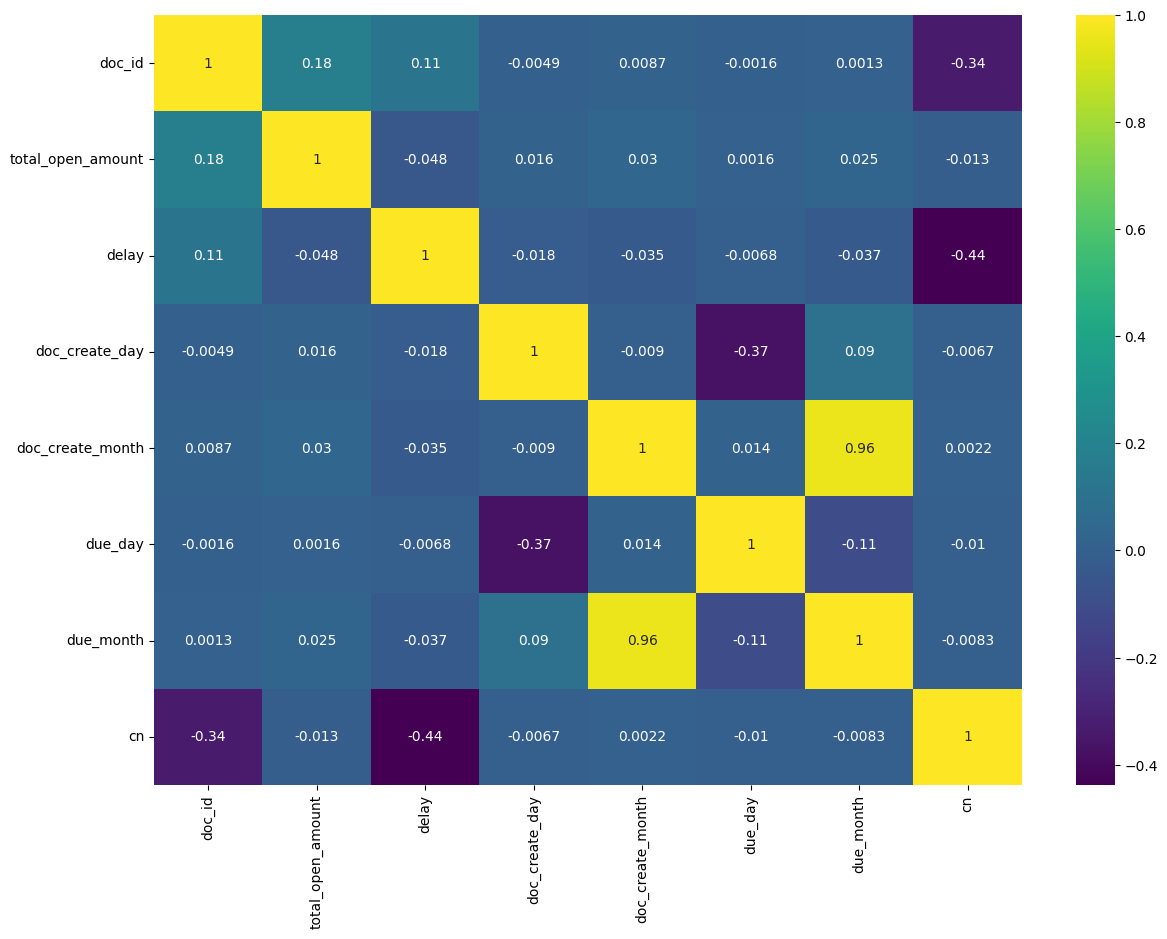

In [87]:
plt.figure(figsize=(14,10))
cor = train_data.corr()
sns.heatmap(cor,cmap = 'viridis',annot=True)

In [88]:
x_train = x_train.drop(["due_month"], axis=1).copy()
x_val1 = x_val1.drop(["due_month"], axis=1).copy()
x_val2 = x_val2.drop(["due_month"], axis=1).copy()
x_test = x_test.drop(["due_month"], axis=1).copy()

In [89]:
clf = xgb.XGBRegressor()
clf.fit(x_train, y_train)
predicted = clf.predict(x_val1)

In [90]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted), 2))
print("R2 score =", round(sm.r2_score(y_val1, predicted), 2))
print("Accuracy= ", clf.score(x_val1,y_val1))

Mean absolute error = 1.93
Mean squared error = 16.72
Median absolute error = 0.96
Explain variance score = 0.55
R2 score = 0.54
Accuracy=  0.5442133549833049


In [91]:
print(np.any(np.isnan(x_train)))
print(np.all(np.isfinite(x_train)))
print(np.any(np.isnan(y_train)))
print(np.all(np.isfinite(y_train)))

False
True
False
True


In [92]:
#x_train=x_train.dropna(axis='columns')

In [93]:
clf2 = RandomForestRegressor()
clf2.fit(x_train, y_train)

RandomForestRegressor()

In [94]:
predicted2 = clf2.predict(x_val1)


In [95]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted2), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted2), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted2), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted2), 2))
print("R2 score =", round(sm.r2_score(y_val1, predicted2), 2))
print("Accuracy= ", clf2.score(x_val1,y_val1))

Mean absolute error = 2.64
Mean squared error = 19.22
Median absolute error = 1.75
Explain variance score = 0.54
R2 score = 0.48
Accuracy=  0.47618896881709505


In [96]:
clf3 = DecisionTreeRegressor()
clf3.fit(x_train, y_train)

DecisionTreeRegressor()

In [97]:
predicted3 = clf3.predict(x_val1)


In [98]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted3), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted3), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted3), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted3), 2))
print("R2 score =", round(sm.r2_score(y_val1, predicted3), 2))
print("Accuracy= ", clf3.score(x_val1,y_val1))

Mean absolute error = 3.57
Mean squared error = 62.04
Median absolute error = 1.0
Explain variance score = -0.59
R2 score = -0.69
Accuracy=  -0.6908409432581639


In [99]:
clf5 = LinearRegression()
clf5.fit(x_train, y_train)

LinearRegression()

In [101]:
predicted5 = clf.predict(x_val1)

In [102]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val1, predicted5), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_val1, predicted5), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_val1, predicted5), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_val1, predicted5), 2))
print("R2 score =", round(sm.r2_score(y_val1, predicted5), 2))
print("Accuracy= ", clf5.score(x_val1,y_val1))

Mean absolute error = 1.93
Mean squared error = 16.72
Median absolute error = 0.96
Explain variance score = 0.55
R2 score = 0.54
Accuracy=  0.3329895126535374


In [103]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [104]:
reg=xgb.XGBRegressor()
random_search=RandomizedSearchCV(reg,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [105]:
random_search.fit(x_train, y_train)
random_search.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [106]:
cl = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=8,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
cl.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
             grow_policy=None, importance_type='gain',
             interaction_constraints='', learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=8, max_leaves=None, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor=None, random_state=0, ...)

In [107]:
predicted = cl.predict(x_val2)


In [108]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_val2, predicted), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_val2, predicted), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_val2, predicted), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_val2, predicted), 2))
print("R2 score =", round(sm.r2_score(y_val2, predicted), 2))
print("Accuracy= ", cl.score(x_val2,y_val2))

Mean absolute error = 2.31
Mean squared error = 30.68
Median absolute error = 1.12
Explain variance score = 0.49
R2 score = 0.49
Accuracy=  0.48657714015880305


In [109]:
predicted1 = cl.predict(x_test)


In [110]:
predicted1=np.around(predicted1)
predicted1.astype(int)

array([1, 4, 2, ..., 4, 4, 4])

In [111]:
len(predicted1)

4819

In [119]:
Col=pd.DataFrame()

In [120]:
Delay=[]
for x in predicted1:
    Delay.append(pd.Timedelta(days=x))
Col['Delay'] = Delay
Col

,Delay
0,1 days
1,4 days
2,2 days
3,2 days
4,1 days
...,...
4814,1 days
4815,0 days
4816,4 days
4817,4 days


In [121]:
Col['clear_date'] = ts['due_in_date']+Col['Delay']
Col

,Delay,clear_date
0,1 days,2020-03-14
1,4 days,2020-03-14
2,2 days,2020-03-15
3,2 days,2020-03-15
4,1 days,2020-03-14
...,...,...
4814,1 days,2020-05-25
4815,0 days,2020-05-27
4816,4 days,2020-06-01
4817,4 days,2020-06-04


In [122]:
aging_bucket = []
for x in predicted1:
    if x<=7:
        aging_bucket.append("0-7 days")
    elif x<=15:
        aging_bucket.append("0-15 days")
    elif x<=30:
        aging_bucket.append("16-30 days")
    elif x<=45:
        aging_bucket.append("31-45 days")
    elif x<=60:
        aging_bucket.append("46-60 days")
    else:
        aging_bucket.append("Greater than 60 days")
Col['Aging Bucket']= aging_bucket
Col.drop(['Delay'],axis=1,inplace=True)
Col

,clear_date,Aging Bucket
0,2020-03-14,0-7 days
1,2020-03-14,0-7 days
2,2020-03-15,0-7 days
3,2020-03-15,0-7 days
4,2020-03-14,0-7 days
...,...,...
4814,2020-05-25,0-7 days
4815,2020-05-27,0-7 days
4816,2020-06-01,0-7 days
4817,2020-06-04,0-7 days


In [126]:
saved_model = pickle.dumps(cl)